## Telecom churn case study - Logistic Regression

In [217]:
#import all the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Step 1: import all the datasets and merge them

In [218]:
churn_data = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\Course_2_Machine_Learning_1\Logistic Regression\Telecom_Churn\Telecom Churn\churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [219]:
customer_data = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\Course_2_Machine_Learning_1\Logistic Regression\Telecom_Churn\Telecom Churn\customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [220]:
internet_data = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\Course_2_Machine_Learning_1\Logistic Regression\Telecom_Churn\Telecom Churn\internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


merging the datasets

In [221]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [222]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Step 2: Inspecting the Dataframe

In [223]:
telecom.shape

(7043, 21)

In [224]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [225]:
telecom.tail()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Male,1,Yes,No,Yes,Fiber optic,No,No,No,No,No,No
7042,3186-AJIEK,66,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,Male,0,No,No,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes


In [226]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [227]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

There is no null value present in the dataset on the first view however, there are 11 rows where TotalCharges are blank but there is a space. Let us remove the 11 rows

In [228]:
telecom = telecom[telecom['TotalCharges'] !=" "]

In [229]:
print(telecom.dtypes)

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
dtype: object


In [230]:
#Now convert datatype of column 'TotalCharges' to float
telecom['TotalCharges'] = telecom['TotalCharges'].astype('float')

In [231]:
telecom.shape

(7032, 21)

In [232]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
dtypes: float64(2), int64(2), ob

check for duplicate values in the dataset

In [233]:
sum(telecom.duplicated())

0

There is no duplicate values

Check if there is any column with unique values

In [234]:
for i in telecom.columns:
    if len(telecom[i].value_counts())==1:
        print(i)

There is no column with unique values

In [235]:
# Take a copy of the dataset
df1 = telecom.copy()

Check Outliers

In [236]:
df1_num = ['tenure','MonthlyCharges','TotalCharges']
df1_outlier = df1[df1_num]
df1_outlier.describe(percentiles = [.05, .25, .5, .75, .95])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
5%,1.000000,19.650000,49.605000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
95%,72.000000,107.422500,6923.590000
max,72.000000,118.750000,8684.800000


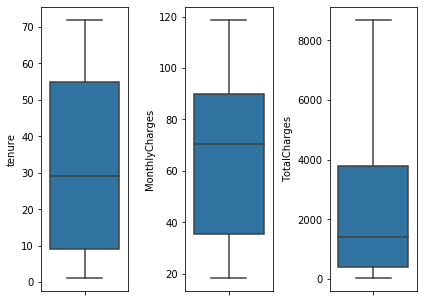

In [237]:
plt.figure(figsize=(10,25))

for i in range(len(df1_num)):
    
    plt.subplot(6, 5, i+1)
    sns.boxplot(y = df1_num[i], data = df1_outlier)

plt.tight_layout()
plt.show()


we can see that there is no outlier present in the dataset

###  Step 3:Data Preparation

Converting some binary variables (Yes/No) to 0/1

In [238]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the housing list
df1[varlist] = df1[varlist].apply(binary_map)

In [239]:
df1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [240]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df1[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
df1 = pd.concat([df1, dummy1], axis=1)

In [241]:
df1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0


In [242]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(df1['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
df1 = pd.concat([df1,ml1], axis=1)
#------------------------------------------------------------------------------
# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(df1['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
df1 = pd.concat([df1,os1], axis=1)
#------------------------------------------------------------------------------
# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(df1['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
df1 = pd.concat([df1,ob1], axis=1)
#------------------------------------------------------------------------------
# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(df1['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
df1 = pd.concat([df1,dp1], axis=1)
#------------------------------------------------------------------------------
# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(df1['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
df1 = pd.concat([df1,ts1], axis=1)
#------------------------------------------------------------------------------
# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(df1['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
df1 = pd.concat([df1,st1], axis=1)
#------------------------------------------------------------------------------
# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(df1['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
df1 = pd.concat([df1,sm1], axis=1)

Dropping the repeated variables

In [243]:
# We have created dummies for the below variables, so we can drop them
df1 = df1.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [244]:
# Drop Customer_id
df1 = df1.drop('customerID',axis=1)

In [245]:
df1.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


### Step 4: Train - Test Split

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
# Store independant variables to X
X = df1.drop(['Churn'], axis = 1)
# Store dependant variable to y
y = df1['Churn']

In [248]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [249]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [250]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (4922, 30)
X_test: (2110, 30)
y_train: (4922,)
y_test: (2110,)



### Step 5: Feature Scaling
 - Feature scaling is a method used to normalize the range of independent variables or features of data. 

In [251]:
from sklearn.preprocessing import StandardScaler

In [252]:
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1


In [253]:
### Checking the Churn Rate
churn = (sum(df1['Churn'])/len(df1['Churn'].index))*100
churn

26.578498293515356

 - We have almost 27% churn rate
  - Checking the churn rate is important as it helps to understand the class imbalance in the dataset. Though the dataset is not properly balanced, but at the same time is not highly imbalanced too. Hence we go ahead with this dataset without any further steps which can reduce (Ex: Log Transformation) the imbalance in the dataset 


Looking at Correlations

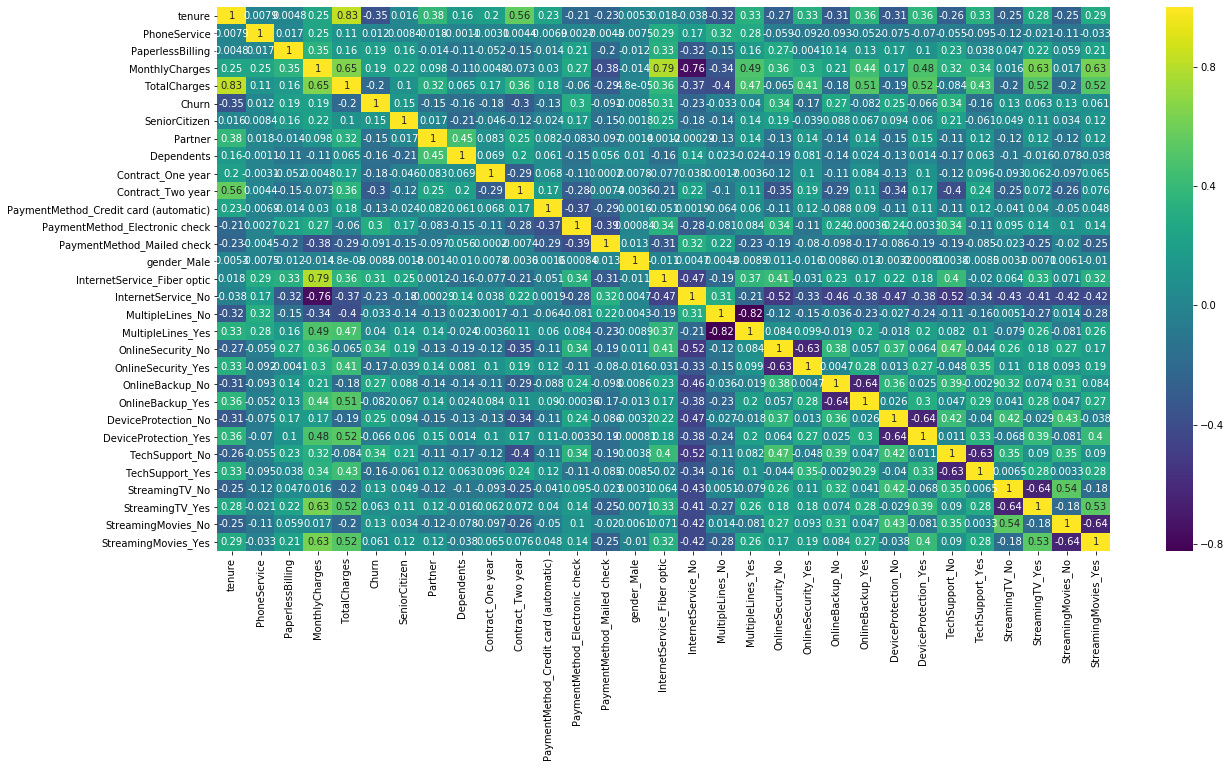

In [254]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df1.corr(),annot = True,cmap='viridis')
plt.show()

Drop few of the highly correlated dummy variables that can be observed from the hitmap

In [255]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

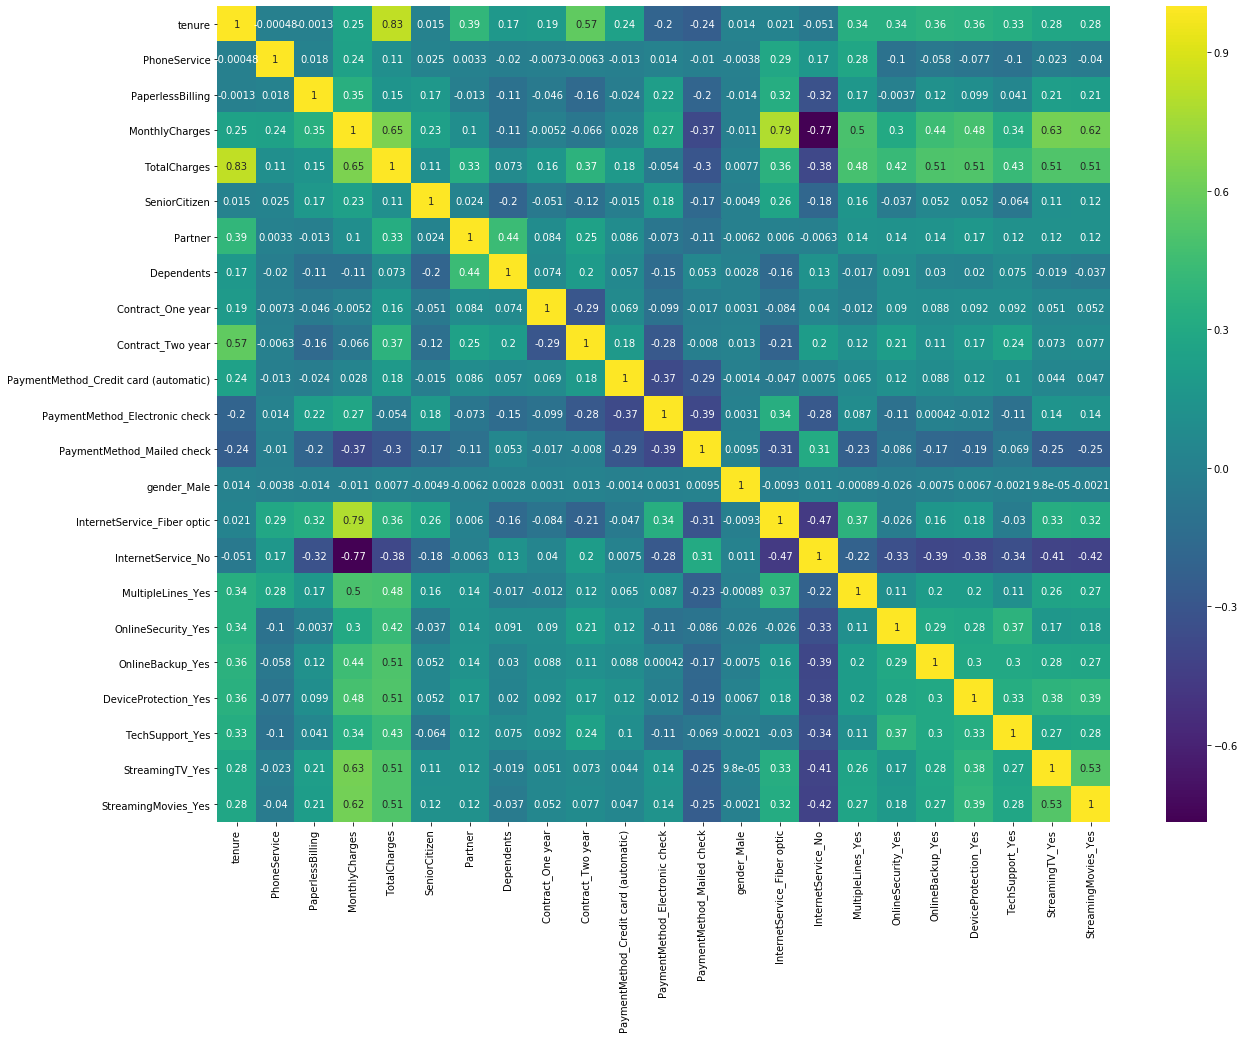

In [256]:
plt.figure(figsize = (20,15))
sns.heatmap(X_train.corr(),annot = True,cmap='viridis')
plt.show()

### Step 6: Model Building

In [257]:
import statsmodels.api as sm

In [258]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sun, 19 Apr 2020   Deviance:                       4009.4
Time:                        19:54:49   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

Feature Selection Using RFE

In [259]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [260]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [261]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True])

In [262]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [263]:
col = X_train.columns[rfe.support_]

In [264]:
X_train_rfe = X_train[col]

In [265]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

Assessing the model with StatsModels

In [266]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Sun, 19 Apr 2020   Deviance:                       4022.2
Time:                        19:54:50   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [267]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [268]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19264205, 0.27562384, 0.59950707, 0.51357126, 0.64823272,
       0.41484553, 0.43118361, 0.80178789, 0.22819404, 0.50457542])

In [269]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.192642,879
1,0,0.275624,5790
2,1,0.599507,6498
3,1,0.513571,880
4,1,0.648233,2784


In [270]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.192642,879,0
1,0,0.275624,5790,0
2,1,0.599507,6498,1
3,1,0.513571,880,1
4,1,0.648233,2784,1


Checking VIFs

In [271]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [272]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,14.85
3,TotalCharges,10.42
0,tenure,7.38
9,InternetService_Fiber optic,5.61
10,InternetService_No,5.27
6,Contract_Two year,3.14
13,StreamingTV_Yes,2.79
14,StreamingMovies_Yes,2.79
1,PaperlessBilling,2.76
11,MultipleLines_Yes,2.38


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.


In [273]:
X = X_train_rfe.drop(['MonthlyCharges'],axis=1)

In [274]:
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Sun, 19 Apr 2020   Deviance:                       4046.2
Time:                        19:54:51   Pearson chi2:                 5.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Let's check the VIFs again

In [275]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.46
0,tenure,6.90
5,Contract_Two year,3.07
8,InternetService_Fiber optic,2.96
13,StreamingMovies_Yes,2.62
12,StreamingTV_Yes,2.59
1,PaperlessBilling,2.55
9,InternetService_No,2.44
10,MultipleLines_Yes,2.27
11,TechSupport_Yes,1.95


In [276]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [277]:
y_train_pred[:10]

array([0.22790197, 0.22864388, 0.67489226, 0.61586836, 0.66226032,
       0.41819928, 0.28813321, 0.7951366 , 0.17433167, 0.51908788])

In [278]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [279]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.227902,879,0
1,0,0.228644,5790,0
2,1,0.674892,6498,1
3,1,0.615868,880,1
4,1,0.662260,2784,1


In [280]:
X = X.drop(['TotalCharges'],axis=1)

In [281]:
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Sun, 19 Apr 2020   Deviance:                       4051.9
Time:                        19:54:52   Pearson chi2:                 5.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [282]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.98
7,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
1,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
0,tenure,2.04
8,InternetService_No,2.03
10,TechSupport_Yes,1.92
3,Contract_One year,1.78


In [283]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [284]:
y_train_pred[:10]

array([0.24581699, 0.26536078, 0.66940978, 0.63097033, 0.68291606,
       0.39952622, 0.27582791, 0.79816753, 0.19878625, 0.52911878])

In [285]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [286]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.245817,879,0
1,0,0.265361,5790,0
2,1,0.669410,6498,1
3,1,0.630970,880,1
4,1,0.682916,2784,1


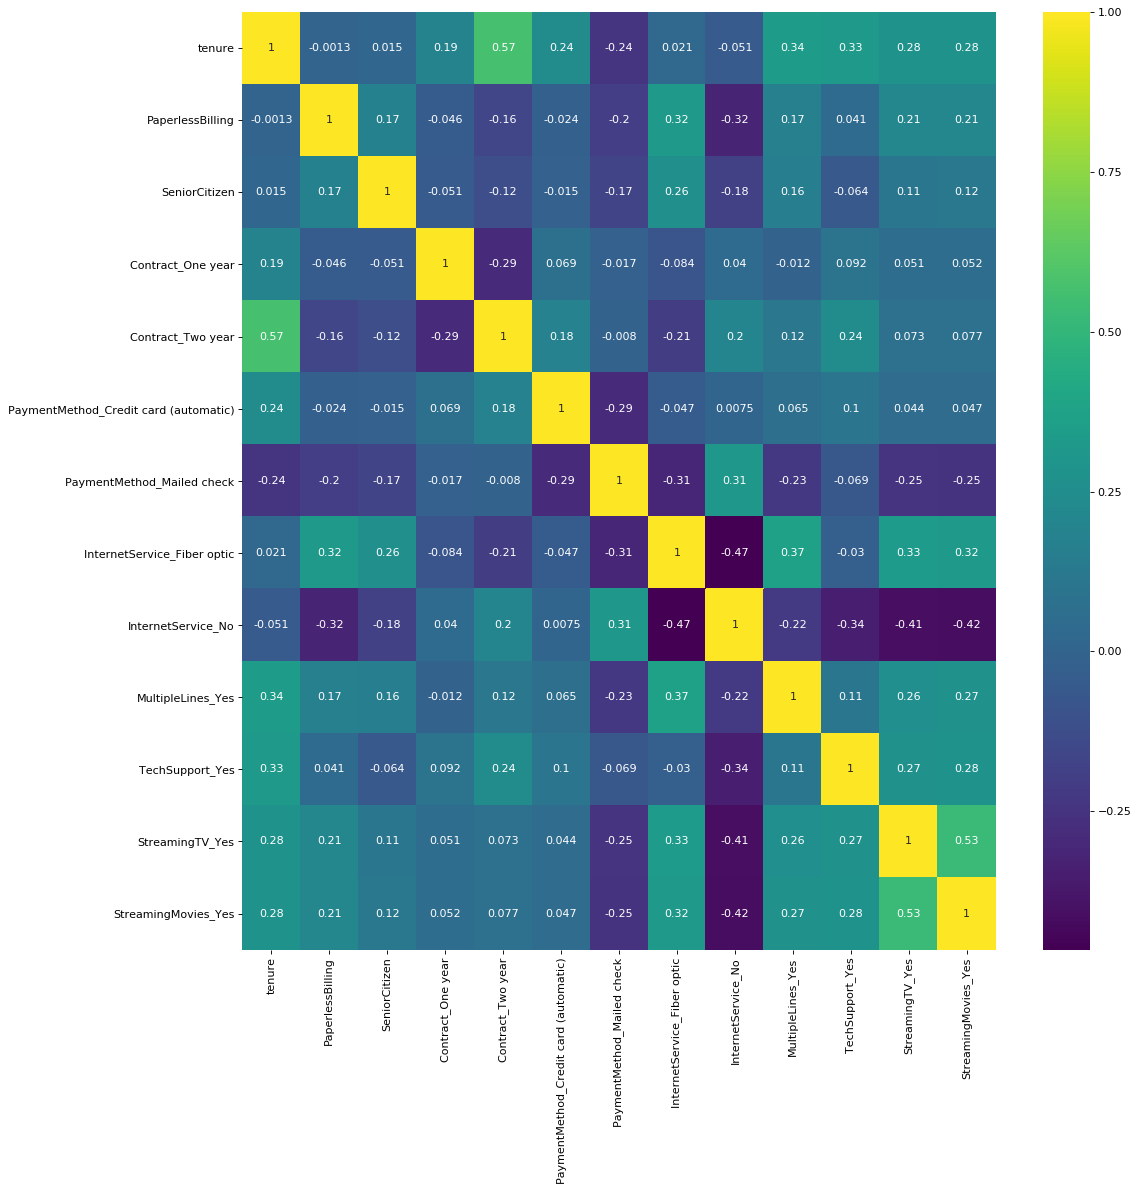

In [287]:
# Hitmap to check the multicolinierity
plt.figure(figsize=(15,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X.corr()
sns.heatmap(cor, annot=True, cmap='viridis')

plt.tight_layout()
plt.show()

In [288]:
#Preserving the columns for future uses
col_1 = X.columns
col_1

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [289]:
from sklearn import metrics

In [290]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3278  357]
 [ 597  690]]


In [291]:
# Predicted     not_churn    churn
# Actual
# not_churn        3274      3651
# churn            590       697  

Confusion Matrix in Visuals

In [292]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8061763510767981


#### Metrics beyond simply accuracy

In [293]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [294]:
print('TP: '+str(TP))
print('TN: '+str(TN))
print('FP: '+str(FP))
print('FN: '+str(FN))

TP: 690
TN: 3278
FP: 357
FN: 597


 -  sensitivity of the model : 
   - Sensitivity is the true positive rate. It tells us out of all the actual '1' labels, how many were correctly predicted.


In [295]:
TP / float(TP+FN)

0.5361305361305362

 - specificity of the model:
    - Specificity is the same as true negative rate, or it is equal to (1 – false positive) rate. It tells us out of all the actual '0' labels, how many were correctly predicted.

In [296]:
TN / float(TN+FP)

0.9017881705639614

 -  false postive rate(FPR) - FPR refers to the ratio of positives incorrectly predicted from all the true labels. It is the frequency of incorrectly predicted false labels.

In [297]:
print(FP/ float(TN+FP))

0.09821182943603851


 - Precision: 
  - It is the proportion of true positives out of predicted positives. To put it in another way, it is the accuracy of the prediction. It is also known as the ‘positive predictive value’.

In [298]:
#Precision - Same as positive predictive value 
print (TP / float(TP+FP))

0.6590257879656161


In [299]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8459354838709677


 - Recall
  - Recall is the same as the true positive rate (TPR) or the sensitivity. 

In [300]:
print(TP/float(TP+FN))

0.5361305361305362


#### Plotting the ROC Curve¶

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [301]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [302]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

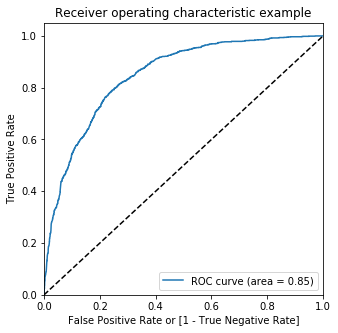

In [303]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Calculating the area under the curve(GINI)
 - By determining the Area under the curve (AUC) of a ROC curve,we can determine how good the model is. If the ROC curve is more towards the upper-left corner of the graph, it means that the model is very good and if it is more towards the 45-degree diagonal, it means that the model is almost completely random. So, the larger the AUC, the better will be the model

In [304]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [305]:
auc = auc_val(fpr,tpr)
auc

0.8478198555227496

#### Finding Optimal Cutoff Point 
 - Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [306]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0
4,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0


In [307]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.614994  0.943279  0.498762
0.2   0.2  0.721861  0.846154  0.677854
0.3   0.3  0.770012  0.776224  0.767813
0.4   0.4  0.790532  0.636364  0.845117
0.5   0.5  0.806176  0.536131  0.901788
0.6   0.6  0.798050  0.380730  0.945805
0.7   0.7  0.776310  0.196581  0.981568
0.8   0.8  0.747867  0.041181  0.998074
0.9   0.9  0.738521  0.000000  1.000000


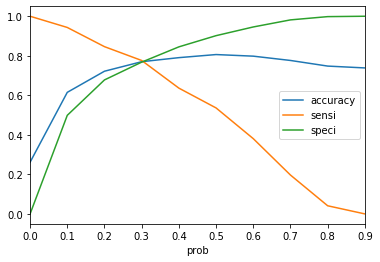

In [308]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [309]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [310]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7700121901665989

In [311]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
confusion1

array([[2791,  844],
       [ 288,  999]], dtype=int64)

In [312]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [313]:
# Check the sensitivity 
TP / float(TP+FN)

0.7762237762237763

In [314]:
# calculate specificity
TN / float(TN+FP)

0.7678129298486933

In [315]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.23218707015130674


In [316]:
#Precision
Precision = TP / float(TP+FP)
print (Precision)

0.5420510037981552


In [317]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9064631373822669


In [318]:
#Recall
Recall = TP/float(TP+FN)
print(Recall)

0.7762237762237763


Find out the same metrics using sklearn utilities

In [319]:
from sklearn.metrics import precision_score, recall_score

In [320]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.5420510037981552

In [321]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7762237762237763

Precision and recall tradeoff

In [322]:
from sklearn.metrics import precision_recall_curve

In [323]:
y_train_pred_final.Churn, y_train_pred_final.final_predicted

(0       0
 1       0
 2       1
 3       1
 4       1
 5       0
 6       0
 7       1
 8       0
 9       1
 10      0
 11      1
 12      1
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      0
 26      0
 27      0
 28      0
 29      0
        ..
 4892    1
 4893    1
 4894    0
 4895    0
 4896    0
 4897    0
 4898    0
 4899    0
 4900    0
 4901    1
 4902    0
 4903    1
 4904    0
 4905    0
 4906    1
 4907    0
 4908    0
 4909    1
 4910    0
 4911    0
 4912    0
 4913    0
 4914    0
 4915    0
 4916    1
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64, 0       0
 1       0
 2       1
 3       1
 4       1
 5       1
 6       0
 7       1
 8       0
 9       1
 10      0
 11      1
 12      1
 13      0
 14      0
 15      0
 16      1
 17      0
 18      0
 19      0
 20      0
 21      1
 22      0
 23      0
 24      0
 25      0
 2

In [324]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

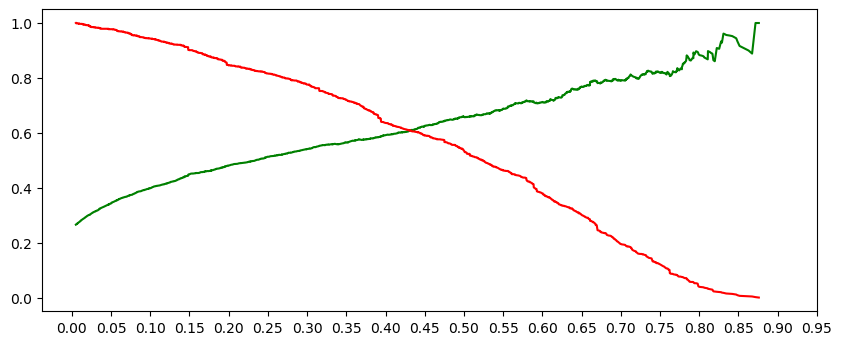

In [325]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

From the precision-recall graph above,the threshold value as close to 0.45. However we have got this with our previous threshold value of 0.3.

#### Calculating the F1 score

In [326]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.6383386581469649

FInd out F1 score using sklearn utilities

In [327]:
from sklearn.metrics import f1_score

In [328]:
f1_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.6383386581469649

### Step 7: Making predictions on the test set
 - Using the scaler function from the train dataset to transform the test dataset


In [329]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [330]:
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.347623,1,1,0.499951,-0.128378,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1
3730,0.999203,1,1,1.319685,1.600302,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,1
1761,1.040015,1,1,-1.342374,-0.343297,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0
2283,-1.286319,1,1,0.223935,-0.979170,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
1872,0.346196,1,0,-1.500335,-0.656086,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [331]:
X_test = X_test[col_1]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.347623,1,0,0,0,1,0,1,0,0,0,0,1
3730,0.999203,1,0,0,0,1,0,1,0,1,0,1,1
1761,1.040015,1,0,0,1,1,0,0,1,1,0,0,0
2283,-1.286319,1,0,0,0,0,1,1,0,0,0,0,0
1872,0.346196,0,0,0,1,0,0,0,1,0,0,0,0


Adding the constant

In [332]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [333]:
y_test_pred = res.predict(X_test_sm)

In [334]:
y_test_pred[:10]

942     0.419725
3730    0.260232
1761    0.008650
2283    0.592626
1872    0.013989
1970    0.692893
2532    0.285289
1616    0.008994
2485    0.602307
5914    0.145153
dtype: float64

In [335]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [336]:
y_pred_1.head()

,0
942,0.419725
3730,0.260232
1761,0.008650
2283,0.592626
1872,0.013989


In [337]:
# Convert y_test to a dataframe
y_test_df = pd.DataFrame(y_test)

In [338]:
# Putting CustomerID to index
y_test_df['CustID'] = y_test_df.index

In [339]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [340]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [341]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.419725
1,1,3730,0.260232
2,0,1761,0.008650
3,1,2283,0.592626
4,0,1872,0.013989


In [342]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [343]:
# Rearrange the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)

Use probability threshold value of 0.30 on the test dataset to predict if a lead will convert or not

In [344]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.30 else 0)

In [345]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.419725,1
1,3730,1,0.260232,0
2,1761,0,0.008650,0
3,2283,1,0.592626,1
4,1872,0,0.013989,0


In [346]:
# check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)
acc_score

0.7407582938388626

In [347]:
confusion_test = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
print(confusion_test)

[[1144  384]
 [ 163  419]]


In [348]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives


In [349]:
print('TP: '+str(TP))
print('TN: '+str(TN))
print('FP: '+str(FP))
print('FN: '+str(FN))

TP: 419
TN: 1144
FP: 384
FN: 163


In [350]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7199312714776632

In [351]:
# Let us calculate specificity
TN / float(TN+FP)

0.7486910994764397

In [352]:
#False Postive Rate
print(FP/ float(TN+FP))

0.2513089005235602


In [353]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.5217932752179327

In [354]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.7199312714776632

ROC Curve on test dataset

In [3591]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [3592]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Churn, y_pred_final.Churn_Prob, drop_intermediate = False )

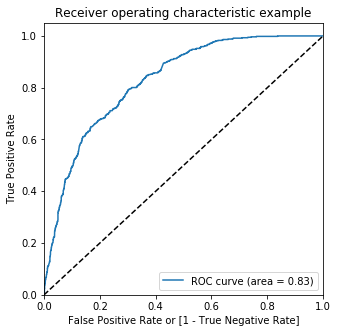

(array([0.        , 0.        , 0.        , ..., 0.9986911 , 0.99934555,
        1.        ]),
 array([0.        , 0.00171821, 0.00343643, ..., 1.        , 1.        ,
        1.        ]),
 array([1.87616664, 0.87616664, 0.87193187, ..., 0.00339706, 0.0030279 ,
        0.00291396]))

In [3593]:
draw_roc(y_pred_final.Churn, y_pred_final.Churn_Prob)

Area Under the Curve(GINI)

In [3594]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [3595]:
auc = auc_val(fpr,tpr)
auc

0.827665929004512

Calculate Customer score

In [3597]:
#Test dataset wirh Conversion Probability and the final predicted value for Converted
cust_test_pred = y_pred_final.copy()


In [3598]:
#Train dataset along with the Conversion Probability and final predicted value for Converted
cust_train_pred = y_train_pred_final.copy()
cust_train_pred.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [3600]:
# Drop columns from train dataset
cust_train_pred = cust_train_pred[['CustID','Churn','Churn_Prob','final_predicted']]
cust_train_pred.head()

,CustID,Churn,Churn_Prob,final_predicted
0,879,0,0.245817,0
1,5790,0,0.265361,0
2,6498,1,0.669410,1
3,880,1,0.630970,1
4,2784,1,0.682916,1


Concatenate the train and the test dataset with the Conversion Probabilities

In [3601]:
cust_full_pred = cust_train_pred.append(cust_test_pred)
cust_full_pred.head()

,CustID,Churn,Churn_Prob,final_predicted
0,879,0,0.245817,0
1,5790,0,0.265361,0
2,6498,1,0.669410,1
3,880,1,0.630970,1
4,2784,1,0.682916,1


In [3602]:
print(cust_train_pred.shape)
print(cust_test_pred.shape)
print(cust_full_pred.shape)

(4922, 4)
(2110, 4)
(7032, 4)


In [3603]:
# Ensuring the customer ids are unique for each customer in the final dataframe
len(cust_full_pred['CustID'].unique().tolist())

7032

In [3604]:
# Calculate the Customer's Churn Score values
# Cust_Score = 100 * Churn_Prob.This needs to be calculated for all the customer from the original dataset (train + test)
cust_full_pred['Cust_Score'] = cust_full_pred['Churn_Prob'].apply(lambda x : round(x*100))
cust_full_pred.head()

,CustID,Churn,Churn_Prob,final_predicted,Cust_Score
0,879,0,0.245817,0,25
1,5790,0,0.265361,0,27
2,6498,1,0.669410,1,67
3,880,1,0.630970,1,63
4,2784,1,0.682916,1,68


In [3606]:
# Convert the CustId column as index
cust_full_pred = cust_full_pred.set_index('CustID').sort_index(axis = 0, ascending = True)
cust_full_pred.head()

,Churn,Churn_Prob,final_predicted,Cust_Score
CustID,,,,
0,0,0.475102,1,48
1,0,0.059119,0,6
2,1,0.384893,1,38
3,0,0.036813,0,4
4,1,0.660841,1,66


In [3607]:
# Get the Customer Number column from original_leads dataframe
df = telecom[['customerID']]
df.head()

,customerID
0,7590-VHVEG
1,5575-GNVDE
2,3668-QPYBK
3,7795-CFOCW
4,9237-HQITU


Concatenating the 2 dataframes with the help of index.Hence, each Lead Number will have a lead score.

In [3609]:
Cust_with_score = pd.concat([df, cust_full_pred], axis=1)
Cust_with_score.head(10)

,customerID,Churn,Churn_Prob,final_predicted,Cust_Score
0,7590-VHVEG,0,0.475102,1,48
1,5575-GNVDE,0,0.059119,0,6
2,3668-QPYBK,1,0.384893,1,38
3,7795-CFOCW,0,0.036813,0,4
4,9237-HQITU,1,0.660841,1,66
5,9305-CDSKC,1,0.773407,1,77
6,1452-KIOVK,0,0.514735,1,51
7,6713-OKOMC,0,0.245618,0,25
8,7892-POOKP,1,0.513396,1,51
9,6388-TABGU,0,0.028923,0,3


In [3610]:
#Inspectin if the final dataframe has any null values

total = pd.DataFrame(Cust_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(Cust_with_score.isnull().sum()/Cust_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Cust_Score,0,0.0
final_predicted,0,0.0
Churn_Prob,0,0.0
Churn,0,0.0
customerID,0,0.0


## Step 8: Calculate Feature Importance

In [3611]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

tenure                                  -0.94
PaperlessBilling                         0.35
SeniorCitizen                            0.46
Contract_One year                       -0.72
Contract_Two year                       -1.30
PaymentMethod_Credit card (automatic)   -0.39
PaymentMethod_Mailed check              -0.33
InternetService_Fiber optic              0.81
InternetService_No                      -0.97
MultipleLines_Yes                        0.21
TechSupport_Yes                         -0.40
StreamingTV_Yes                          0.34
StreamingMovies_Yes                      0.24
dtype: float64

In [3612]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

tenure                                  -117.07
PaperlessBilling                          42.91
SeniorCitizen                             57.09
Contract_One year                        -89.65
Contract_Two year                       -161.29
PaymentMethod_Credit card (automatic)    -48.11
PaymentMethod_Mailed check               -41.07
InternetService_Fiber optic              100.00
InternetService_No                      -120.80
MultipleLines_Yes                         26.04
TechSupport_Yes                          -50.25
StreamingTV_Yes                           42.10
StreamingMovies_Yes                       30.15
dtype: float64

In [3613]:
feature_importance_1 = pd.DataFrame(feature_importance)
feature_importance_1.reset_index()
feature_importance_1.rename(columns={'index':'feature',0:'rank'},inplace = True)
feature_importance_1 = feature_importance_1.sort_values('rank',ascending = False)
feature_importance_1.head(3) #top 3 features

,rank
InternetService_Fiber optic,100.00
SeniorCitizen,57.09
PaperlessBilling,42.91
